In [90]:
import numpy as np
import pandas as pd

In [91]:
df = pd.read_csv('C:/Users/HP/Desktop/Programming/Projects/Prasunet Intern Projects/Project 2-k Means/dataset/Mall_Customers.csv')

In [92]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [93]:
df.shape

(200, 5)

In [94]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [95]:
df.duplicated().sum()

0

In [96]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [97]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [98]:
df = df.drop(['CustomerID'], axis=1)

In [99]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [100]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [135]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[((df > (Q1 - 1.5 * IQR)) | (df < (Q3 + 1.5 * IQR)))]


In [187]:
print(f'Q1 \n{Q1}\n\nQ3\n {Q3} \n\nQ1 - 1.5 * IQR\n {Q1 - 1.5 * IQR} \n\nQ3 + 1.5 * IQR\n{Q3 + 1.5 * IQR}')

Q1 
Gender                     0.00
Age                       28.75
Annual Income (k$)        41.50
Spending Score (1-100)    34.75
Name: 0.25, dtype: float64

Q3
 Gender                     1.0
Age                       49.0
Annual Income (k$)        78.0
Spending Score (1-100)    73.0
Name: 0.75, dtype: float64 

Q1 - 1.5 * IQR
 Gender                    -1.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64 

Q3 + 1.5 * IQR
Gender                      2.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64


In [144]:
df = df[df['Annual Income (k$)'] < 132.750]

In [145]:
df.shape

(198, 4)

In [146]:
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [147]:
def initialize_centroids(data, k):
    return data[:k]


In [148]:
def assign_clusters(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)


In [149]:
def update_centroids(data, clusters, k):
    n = data.shape[1]  # Number of features
    centroids = np.zeros((k, n))  # Initialize new centroids array
    
    for i in range(k):
        cluster_data = data[clusters == i]
        centroids[i] = np.mean(cluster_data, axis=0)
    
    return centroids

In [150]:
def kmeans(data, k, max_iterations=500):
    centroids = initialize_centroids(data, k)
    
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, clusters

In [151]:
import matplotlib.pyplot as plt

In [152]:
def elbow_method(data, max_k=10):
    sse = []
    for k in range(1, max_k + 1):
        centroids, clusters = kmeans(data, k)
        sse.append(np.sum((data - centroids[clusters])**2))
    
    plt.figure(figsize=(10, 7))
    plt.plot(range(1, max_k + 1), sse, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared distances')
    plt.show()

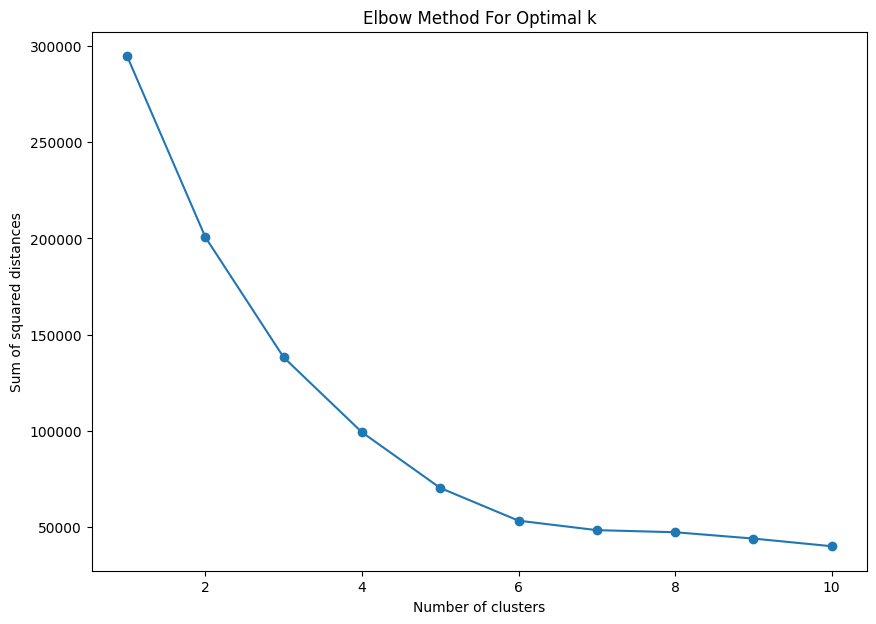

In [153]:
elbow_method(features.values, max_k=10)

In [189]:
# K = 5

In [171]:
k = 5
final_centroids, final_clusters = kmeans(features.values, k)
print("Final Centroids:\n", final_centroids)
print("Final Clusters:\n", final_clusters)

Final Centroids:
 [[ 0.60869565 45.2173913  26.30434783 20.91304348]
 [ 0.60869565 25.52173913 26.30434783 78.56521739]
 [ 0.48571429 40.91428571 86.34285714 17.57142857]
 [ 0.55263158 32.76315789 85.21052632 82.10526316]
 [ 0.58227848 43.08860759 55.29113924 49.56962025]]
Final Clusters:
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 2 3 4 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 4 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [172]:
import matplotlib.pyplot as plt

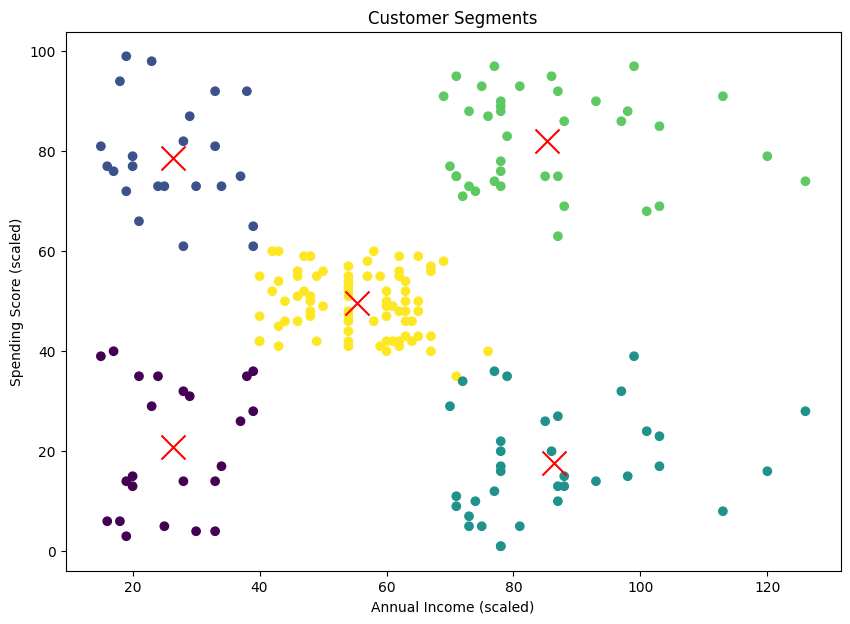

In [173]:
plt.figure(figsize=(10, 7))
plt.scatter(features.values[:, 2], features.values[:, 3], c=final_clusters, cmap='viridis')
plt.scatter(final_centroids[:, 2], final_centroids[:, 3], s=300, c='red', marker='x')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

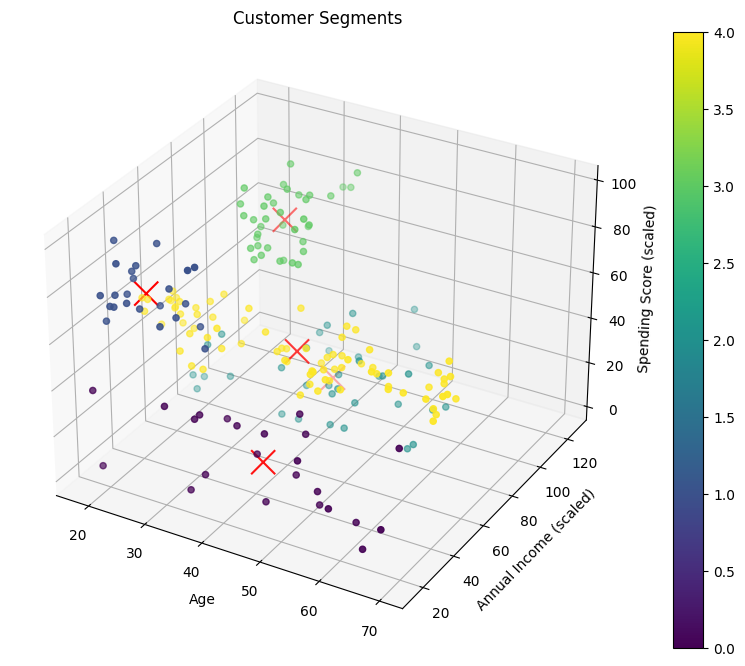

In [174]:
from mpl_toolkits.mplot3d import Axes3D

# Visualization in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
sc = ax.scatter(features.values[:, 1], features.values[:, 2], features.values[:, 3], c=final_clusters, cmap='viridis')

# Plot the centroids
ax.scatter(final_centroids[:, 1], final_centroids[:, 2], final_centroids[:, 3], s=300, c='red', marker='x')

ax.set_title('Customer Segments')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score (scaled)')

# Add a legend
plt.colorbar(sc)

plt.show()


In [175]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features.values,final_clusters)

In [176]:
silhouette_avg

0.44840809683798866

In [177]:
# k is equal to 6

In [178]:
k = 6
final_centroids, final_clusters = kmeans(features.values, k)
print("Final Centroids:\n", final_centroids)
print("Final Clusters:\n", final_clusters)

Final Centroids:
 [[ 0.59090909 44.31818182 25.77272727 20.27272727]
 [ 0.59090909 25.27272727 25.72727273 79.36363636]
 [ 0.44117647 41.97058824 86.79411765 17.26470588]
 [ 0.65789474 27.         56.65789474 49.13157895]
 [ 0.56818182 56.34090909 53.70454545 49.38636364]
 [ 0.55263158 32.76315789 85.21052632 82.10526316]]
Final Clusters:
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 4 1 0 3 0 1 4 3 3 3 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 3 4 4 3 3 4 4 4 4
 4 3 4 3 3 4 4 3 4 4 3 4 4 3 3 4 4 3 4 3 3 3 4 3 4 3 3 4 4 3 4 3 4 4 4 4 4
 3 3 3 3 3 4 4 4 4 3 3 3 5 3 5 2 5 2 5 2 5 3 5 2 5 2 5 2 5 2 5 3 5 2 5 2 5
 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2
 5 2 5 2 5 2 5 2 5 2 5 2 5]


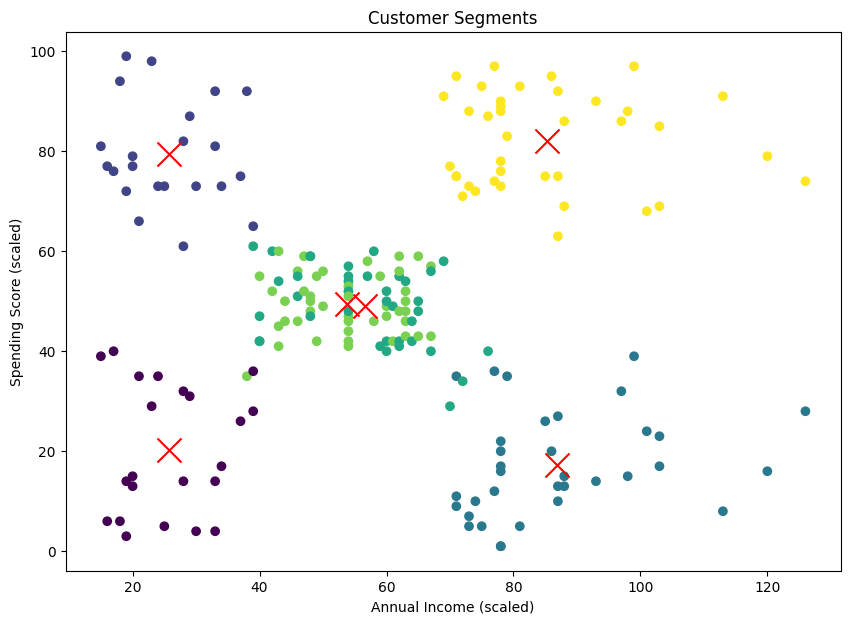

In [179]:
plt.figure(figsize=(10, 7))
plt.scatter(features.values[:, 2], features.values[:, 3], c=final_clusters, cmap='viridis')
plt.scatter(final_centroids[:, 2], final_centroids[:, 3], s=300, c='red', marker='x')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

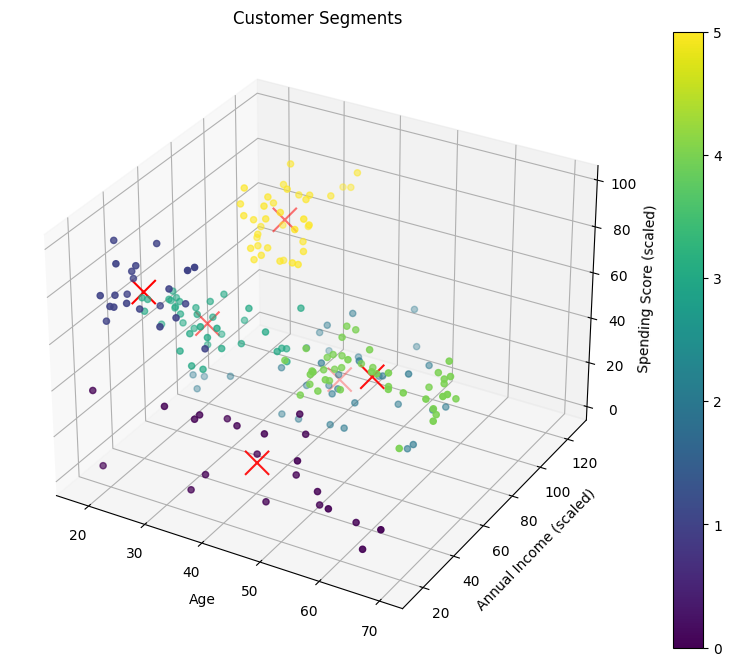

In [180]:
from mpl_toolkits.mplot3d import Axes3D

# Visualization in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
sc = ax.scatter(features.values[:, 1], features.values[:, 2], features.values[:, 3], c=final_clusters, cmap='viridis')

# Plot the centroids
ax.scatter(final_centroids[:, 1], final_centroids[:, 2], final_centroids[:, 3], s=300, c='red', marker='x')

ax.set_title('Customer Segments')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (scaled)')
ax.set_zlabel('Spending Score (scaled)')

# Add a legend
plt.colorbar(sc)

plt.show()


In [181]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features.values,final_clusters)

In [182]:
silhouette_avg

0.45955989969588884